**CODEALPHA TASK 3: Sales Prediction**

**Student ID: CA/DF1/22584**

**Name: Sunit Modak**

In [1]:
# Importing All Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# LOAD THE DATASET
data = pd.read_csv("Advertising.csv")

In [3]:
# Display first 5 rows
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
# Check dataset structure and data types
print(data.info())

# Check for null or missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
# Summary statistics of numerical columns
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


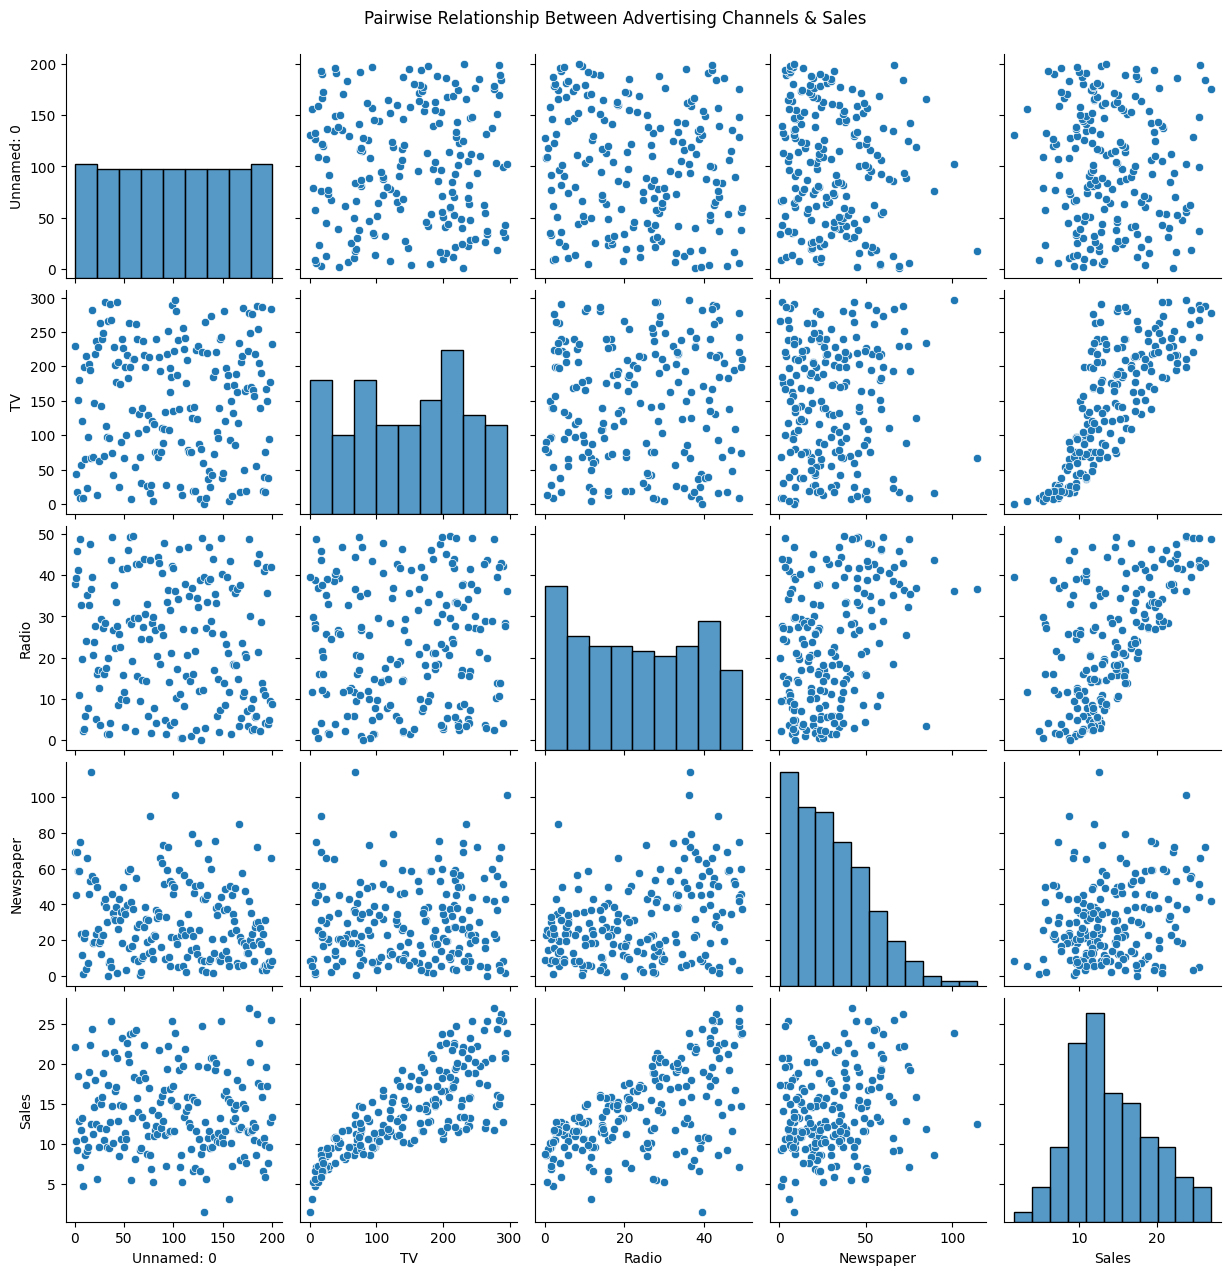

In [6]:
# Visualize relationships between features and target
sns.pairplot(data)
plt.suptitle("Pairwise Relationship Between Advertising Channels & Sales", y=1.02)
plt.show()

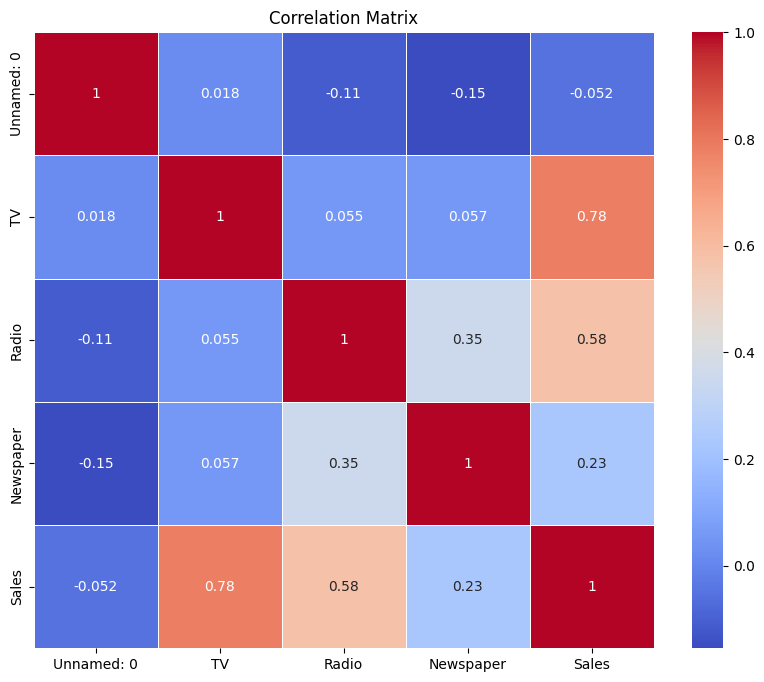

In [7]:
# Correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Independent variables (features)
X = data[['TV', 'Radio', 'Newspaper']]

# Dependent variable (target)
Y = data['Sales']

In [9]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
  X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160, 3), (40, 3))

In [10]:
# Create Linear Regression model
model = LinearRegression()

In [11]:
# Train model using training data
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Train model using training data
model.fit(X_train, Y_train)


LinearRegression()

In [13]:
# Predict sales for test data
Y_pred = model.predict(X_test)

In [14]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)


mae, mse, rmse, r2

(1.4607567168117603,
 3.1740973539761033,
 np.float64(1.78159966153345),
 0.899438024100912)

In [15]:
# Analyze impact of each advertising channel
coefficients = pd.DataFrame({
    "Advertisement_Channel": X.columns,
    "Impact_on_Sales": model.coef_
})

coefficients

,Advertisement_Channel,Impact_on_Sales
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


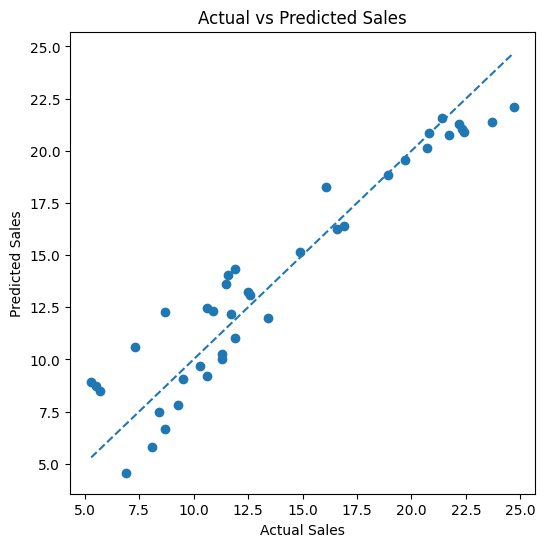

In [16]:
# Actual vs Predicted Sales Plot
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle="--")
plt.show()

In [17]:
print("Conclusion:")
print("1. TV advertising has the highest impact on sales.")
print("2. Radio advertising contributes moderately.")
print("3. Newspaper advertising has minimal effect.")
print("4. Marketing budgets should prioritize TV and Radio.")
print("5. Linear Regression provides clear and interpretable insights.")

Conclusion:
1. TV advertising has the highest impact on sales.
2. Radio advertising contributes moderately.
3. Newspaper advertising has minimal effect.
4. Marketing budgets should prioritize TV and Radio.
5. Linear Regression provides clear and interpretable insights.


In [19]:
# =========================
# USER INPUT PREDICTION CELL
# =========================

# Take advertising budget inputs from the user
# Input values should be in the same unit as the dataset

tv_budget = float(input("Enter TV Advertisement Budget: "))
radio_budget = float(input("Enter Radio Advertisement Budget: "))
newspaper_budget = float(input("Enter Newspaper Advertisement Budget: "))


# Convert user input into a DataFrame
# IMPORTANT: Column order must match training data
user_input = pd.DataFrame(
    [[tv_budget, radio_budget, newspaper_budget]],
    columns= ['TV', 'Radio', 'Newspaper']
)

# Predict sales based on user input
predicted_sales = model.predict(user_input)

# Display Result
print("\nPredict Sales based on given advertisement budget: ")
print(f"Sales: {predicted_sales[0]:.2f}")

Enter TV Advertisement Budget: 150
Enter Radio Advertisement Budget: 25
Enter Newspaper Advertisement Budget: 10

Predict Sales based on given advertisement budget: 
Sales: 14.45
